# WRT - AT - Technical Assessment - EDA
Notebook for exploring the raw data, performing data manipulation in preparation for modelling and analysis relationships within the data.

## Setup

In [23]:
# load libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [24]:
# setup notebook
pd.set_option("display.max_columns", None)

## Load

In [25]:
# load data
directory_path = "/Users/nb1777/Git/wrt_at"
file_path = "vehicle_price_prediction/vehicle_price_prediction/data/at_vehicle_data.csv"
df_raw = pd.read_csv("/".join([directory_path, file_path]))

## Explore

In [26]:
# examine - example data
df_raw.head(5)

,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
0,BMW,X1,SUV,Petrol,2.0,Automatic,2.0 20i xLine Auto xDrive Euro 6 (s/s) 5dr,21,2021.0,13434,32000,Blue,BS,100.4,1,1,1,0,1,1,0,1,1,1
1,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Automatic,218i M Sport Gran Coupe,71,2021.0,6347,32898,Blue,G,111.3,1,0,1,0,0,0,1,0,0,0
2,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Manual,1.5 218i M Sport Euro 6 (s/s) 4dr,NaN,NaN,10,35510,Blue,PE,NaN,1,1,1,0,1,0,1,1,0,0
3,BMW,4 Series,Coupe,Diesel Hybrid,2.0,Automatic,2.0 420d MHT M Sport Auto Euro 6 (s/s) 2dr,71,2022.0,6500,37999,Grey,B,102.5,1,1,1,0,1,1,1,0,0,0
4,BMW,1 Series,Hatchback,Diesel,2.0,Manual,2.0 116d Sport Euro 5 (s/s) 5dr,62,2012.0,136952,4890,Black,S,99.1,0,0,0,0,0,0,0,0,0,0


### Shape

In [27]:
# examine - dimensions
print(df_raw.shape)

(9753, 24)


### Unique

In [28]:
# examine – unique values per column
for col in df_raw.columns:
    print(f"{col} (nunique:{df_raw[col].nunique()})\n{df_raw[col].unique()}\n")

make (nunique:1)
['BMW']

model (nunique:58)
['X1' '2 Series Gran Coupe' '4 Series' '1 Series' '2 Series Gran Tourer'
 '2 Series' 'X4' '2 Series Active Tourer' '7 Series' '3 Series' '5 Series'
 '6 Series Gran Turismo' 'X3' 'iX' 'iX3' 'i3' 'Z4' '6 Series' 'M4'
 'M8 Gran Coupe' 'X5' 'X7' '4 Series Gran Coupe' 'X6' 'M2'
 '3 Series Gran Turismo' 'X2' '8 Series' 'M3' 'M6 Gran Coupe' 'M6' 'i4'
 '6 Series Gran Coupe' '8 Series Gran Coupe' 'X4 M' 'M5' 'X5 M' 'i7' 'Z8'
 'Z3' 'Alpina Unspecified Models' 'X3 M' 'i8' 'Z4 M' 'M8'
 '5 Series Gran Turismo' 'Alpina D4' 'Alpina D5' 'X6 M' 'Alpina B5'
 'Alpina D3' 'Alpina B6' 'Z3 M' 'Alpina B3' 'Alpina XD3' 'M1' 'iX1'
 'Alpina B10']

body_type (nunique:8)
['SUV' 'Saloon' 'Coupe' 'Hatchback' 'MPV' 'Estate' 'Convertible'
 'Unlisted']

fuel_type (nunique:7)
['Petrol' 'Diesel Hybrid' 'Diesel' 'Electric' 'Petrol Plug-in Hybrid'
 'Petrol Hybrid' 'Unlisted']

engine_size (nunique:24)
[2.  1.5 3.  nan 0.  4.4 1.6 3.2 2.5 4.9 1.8 4.  2.8 6.6 1.9 2.2 3.5 4.8
 5. 

- All vehicles are BMWs
- Various vehicles models are included (58 variants)
- Different body types are included, including 'Unlisted' (8 variants)
- Different fuel types are included, including 'Unlisted' (7 variants)
- Different engine sizes are included, including NAs and 0. (24 variants)
- Three transmission values, including 'Unlisted' (3 variants)
- Many derivates (2024 variants) -> how should these be handled?
- Many plate values, including NAs and letters (57 variants) -> how should they be handled?
- Multiple years, including NAs (34 variants)
- Many mileage values (6287 variants)
- Many prices values (6287 variants)
- Different colours (15 variants)
- Many unique area values (115 variants) -> what is this value, likely postcode...?
- Various price position values (456 variants) -> to be investigated as part of analysis
- Binary values for features 1 - 10 (2 variants) -> as expected, binary classification (one-hot encoding of feature)


### Data Types

In [29]:
# examine - data types
print(df_raw.dtypes)

make               object
model              object
body_type          object
fuel_type          object
engine_size       float64
transmission       object
derivative         object
plate              object
year              float64
mileage             int64
price               int64
colour             object
area               object
price_position    float64
feature_1           int64
feature_2           int64
feature_3           int64
feature_4           int64
feature_5           int64
feature_6           int64
feature_7           int64
feature_8           int64
feature_9           int64
feature_10          int64
dtype: object


In [30]:
# extract - column types
# initialise lists
binary_columns = []
numeric_columns = []
categorical_columns = []

# iterate through df.dtypes (columns x data type pair)
for column, dtype in df_raw.dtypes.items():
    # feature_ = binary
    if "feature" in column:
        binary_columns.append(column)
    # other numerics
    elif pd.api.types.is_numeric_dtype(dtype):
        numeric_columns.append(column)
    # categorical
    else:
        categorical_columns.append(column)

# output
print("Binary Columns:", binary_columns)
print("Numeric Columns:", numeric_columns)
print("Categorical Columns:", categorical_columns)

Binary Columns: ['feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10']
Numeric Columns: ['engine_size', 'year', 'mileage', 'price', 'price_position']
Categorical Columns: ['make', 'model', 'body_type', 'fuel_type', 'transmission', 'derivative', 'plate', 'colour', 'area']


### Summary

In [31]:
# summary statistics
df_raw.describe()

,engine_size,year,mileage,price,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
count,9611.000000,8923.000000,9753.000000,9753.000000,8539.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000,9753.000000
mean,2.228166,2016.712877,45034.542295,27505.817902,99.654152,0.746642,0.692300,0.634984,0.079155,0.525377,0.643494,0.769404,0.053419,0.457808,0.077002
std,0.799134,4.076801,36637.947183,20213.797435,6.141229,0.434956,0.461565,0.481459,0.269995,0.499381,0.478992,0.421236,0.224880,0.498242,0.266608
min,0.000000,1982.000000,0.000000,1090.000000,41.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2015.000000,15501.000000,14390.000000,96.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,2018.000000,37500.000000,21999.000000,99.500000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,3.000000,2019.000000,68460.000000,34500.000000,102.600000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
max,6.600000,2023.000000,240000.000000,225000.000000,167.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Missing values evident as count not equal to number of rows (9753) -> handling of missing values is required
- Engine size of 0 needs investigating
- Year, Mileage and Price may contain 'outliers'

### Missing Values

In [32]:
# missing values
df_raw.isna().sum()

make                 0
model                0
body_type            0
fuel_type            0
engine_size        142
transmission         0
derivative           4
plate              801
year               830
mileage              0
price                0
colour             142
area                 0
price_position    1214
feature_1            0
feature_2            0
feature_3            0
feature_4            0
feature_5            0
feature_6            0
feature_7            0
feature_8            0
feature_9            0
feature_10           0
dtype: int64

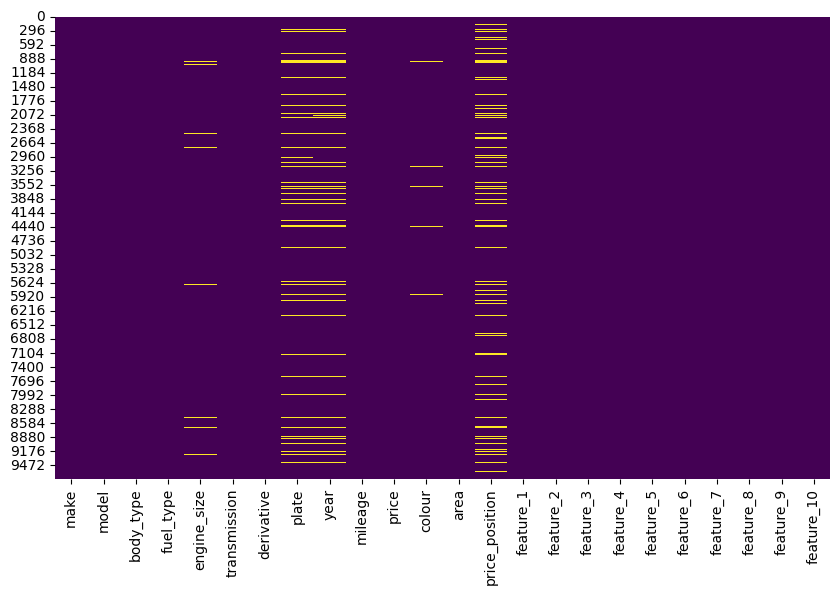

In [33]:
# visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df_raw.isna(), cbar=False, cmap="viridis")
plt.show()

- Can missing values in `engine_size` be extracted from `derivate` (which contains no missing values)?
- `plate` and `year` are almost entirely aligned when values are missing -> can do some substituion to help populate missing values?
- Missing values in `colour` could be replaced with unknown instead of dropping?
- Missing values in `price_position` are not important at this time, as feature is not to be used in model

#### !!! Handling Missing Values !!!

##### Engine Size (Missing Values)

- could we replace missing engine_size values by examining the derivative field and extractig the enginer_size from the text, or matching derivative from other complete rows and using the engine_size?


In [34]:
# subset for engine_size missing values
df_raw[df_raw["engine_size"].isna() == True].head(10)

,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
19,BMW,iX,SUV,Electric,NaN,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 22kW Charger,NaN,NaN,10,105490,Black,DE,NaN,0,0,1,0,1,0,1,0,0,0
20,BMW,iX3,SUV,Electric,NaN,Automatic,80kWh M Sport Auto 5dr,NaN,NaN,0,60490,Grey,WA,NaN,1,1,1,1,1,0,1,0,0,1
95,BMW,iX3,SUV,Electric,NaN,Automatic,80kWh M Sport Pro Auto 5dr,NaN,NaN,0,63999,Blue,ST,NaN,1,1,1,1,1,1,1,0,0,1
191,BMW,iX,SUV,Electric,NaN,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 22kW Charger,NaN,NaN,10,117999,Black,CW,NaN,1,0,1,0,1,1,1,0,0,0
193,BMW,i3,Hatchback,Electric,NaN,Automatic,33kWh Auto 5dr,18,2018.0,24196,16799,Multicolour,NW,87.4,0,0,0,0,0,1,1,0,0,0
323,BMW,i7,Saloon,Electric,NaN,Automatic,60 105.7kWh M Sport Auto xDrive 4dr,72,2023.0,50,167870,Black,LE,NaN,1,0,1,1,1,0,1,0,0,0
468,BMW,i3,Hatchback,Electric,NaN,Automatic,42.2kWh Auto 5dr,70,2020.0,15935,24795,Grey,BT,108.1,0,1,0,0,1,1,1,0,1,0
592,BMW,iX,SUV,Electric,NaN,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 11kW Charger,NaN,NaN,0,97990,Black,WA,NaN,1,0,1,0,1,0,1,0,0,0
593,BMW,iX3,SUV,Electric,NaN,Automatic,80kWh M Sport Auto 5dr,NaN,NaN,10,66515,Grey,S,NaN,0,0,0,0,0,0,0,0,0,0
598,BMW,2 Series Gran Coupe,Saloon,Petrol,NaN,Manual,BMW 2 Series Gran Coupe 218i M Sport,NaN,NaN,10,35270,NaN,CV,NaN,1,0,0,0,0,0,1,0,0,0


- it's seems that in some instances, where `engine_size = NaN`, fuel_type is `Electric` -> investigate further and decide on method to handle the NaN values -> convert engine_size to categorical and replace 'Electric' fuel_type NaNs with `Electric`?
- can other engine types be handled by finding similar rows?

In [35]:
df_raw[df_raw["engine_size"].isna() == True].groupby(["fuel_type"]).size()

fuel_type
Diesel                     5
Electric                 114
Petrol                    19
Petrol Plug-in Hybrid      1
Unlisted                   3
dtype: int64

In [36]:
# convert engine_size from numerical to catgeorical
df_raw["engine_size_category"] = df_raw["engine_size"].astype("object")

In [37]:
# replace NaNs in engine_size, where fuel_type is Electric
df_raw.loc[
    (df_raw["engine_size_category"].isna()) & (df_raw["fuel_type"] == "Electric"),
    "engine_size_category",
] = "E"

In [38]:
# subset for engine_size missing values
df_missing = df_raw[df_raw["engine_size_category"].isna() == True]
print(df_missing.shape)
df_raw[df_raw["engine_size_category"].isna() == True].head(10)

(28, 25)


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,engine_size_category
598,BMW,2 Series Gran Coupe,Saloon,Petrol,NaN,Manual,BMW 2 Series Gran Coupe 218i M Sport,NaN,NaN,10,35270,NaN,CV,NaN,1,0,0,0,0,0,1,0,0,0,NaN
1192,BMW,X5,SUV,Diesel,NaN,Automatic,BMW X5 xDrive40d M Sport,NaN,NaN,10,74265,Black,LE,NaN,0,0,0,0,0,0,1,0,0,0,NaN
1837,BMW,1 Series,Hatchback,Petrol,NaN,Automatic,BMW 1 Series 128ti,NaN,NaN,10,36910,White,B,NaN,0,0,0,0,1,0,0,0,0,0,NaN
2001,BMW,Z3,Convertible,Petrol,NaN,Manual,1.9 2dr,S,1999.0,46000,5500,NaN,DY,NaN,0,0,0,0,0,1,0,1,0,0,NaN
2331,BMW,X3,SUV,Diesel,NaN,Automatic,BMW X3 xDrive20d M Sport,NaN,NaN,10,52615,Black,B,NaN,0,0,0,0,0,0,1,0,0,0,NaN
2459,BMW,M4,Unlisted,Petrol,NaN,Automatic,BMW M4 Competition Coupe M4 Competition,NaN,NaN,10,78995,Yellow,CT,NaN,0,1,0,0,0,0,1,0,0,0,NaN
2974,BMW,X3 M,SUV,Petrol,NaN,Automatic,BMW X3 M Competition M Competition,NaN,NaN,10,82764,Blue,CT,NaN,0,1,0,0,0,0,1,0,0,0,NaN
3076,BMW,Alpina B6,Unlisted,Unlisted,NaN,Unlisted,NaN,10,2010.0,42500,39995,NaN,N,NaN,1,0,0,1,0,0,0,0,0,0,NaN
3229,BMW,8 Series,Coupe,Petrol,NaN,Automatic,BMW 8 Series Coupe M850i xDrive,NaN,NaN,10,101150,Green,B,NaN,0,0,0,0,1,0,0,0,0,0,NaN
3584,BMW,8 Series,Coupe,Petrol,NaN,Automatic,BMW 8 Series Coupe 840i M Sport,NaN,NaN,10,70000,Green,NG,NaN,0,0,0,0,0,0,1,0,0,0,NaN


In [41]:
## replacing missing `engine_size` values using the mode `engine_size` value per `model` and `body_type` combination

# rows without missing values
complete_rows = df_raw[df_raw["engine_size_category"].isna() == False]
# print(complete_rows)

# group by `model` and `body_type` and calculate the mode `engine_size` for each group
mode_per_category = (
    complete_rows.groupby(["model", "body_type"])["engine_size"]
    .agg(lambda x: x.mode())
    .reset_index()
)
print(mode_per_category)

# function to apply mode per category to missing values
def fill_missing_var_with_mode(vars, row):
    mode_value = mode_per_category.query(
        "model == @row['model'] & body_type == @row['body_type']"
    )["engine_size"]

    # check if mode value found
    if len(mode_value) > 0:

        # if multiple modes, cannot select a value
        if "[" in str(mode_value.values[0]):
            return np.nan
        else:
            # use mode value
            return mode_value.values[0]

    else:
        return np.nan


# apply function to fill in the missing values in rows with missing values
missing_value_indexes = df_raw[df_raw["engine_size_category"].isna() == True].index

for idx in missing_value_indexes:
    df_raw.loc[idx, "engine_size_category"] = fill_missing_var_with_mode(
        ["engine_size", "body_type"], df_raw.iloc[idx]
    )

       model    body_type engine_size
0   1 Series  Convertible         2.0
1   1 Series        Coupe         2.0
2   1 Series    Hatchback         2.0
3   2 Series  Convertible         2.0
4   2 Series        Coupe         2.0
..       ...          ...         ...
77        i8  Convertible         1.5
78        i8        Coupe         1.5
79        iX          SUV         0.0
80       iX1          SUV          []
81       iX3          SUV         0.0

[82 rows x 3 columns]


##### Colour (Missing Values)

In [46]:
# to retain as much data as possible, replace NaNs in `colour` with 'Unknown'
df_raw.loc[(df_raw["colour"].isna()), "colour"] = "Unknown"

##### Derivative (Missing Values)

In [48]:
# to retain as much data as possible, replace NaNs in `derivative` with 'Unknown'
df_raw.loc[(df_raw["derivative"].isna()), "derivative"] = "Unknown"

##### Plate and Year (Missing Values)

In [50]:
df_raw[(df_raw["plate"].isna() == True) | ((df_raw["year"].isna() == True))].head(10)

## WRT: HOW DO WE HANDLE MISSING PLATE AND YEAR VALUES? (YEAR HAS QUITE A CORRELATION WITH PRICE?)
## COULD WE REPLACE YEAR WITH AVERAGE FROM MODEL, BODY_TYPE, DERIVATIVE COMBO?
## COULD WE DROP PLATE AND YEAR?
## DON"T WANT TO DROP YEAR WITH MISSING VALUES AS IT MAKES UP 10% OF THE DATA...

,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,engine_size_category
2,BMW,2 Series Gran Coupe,Saloon,Petrol,1.5,Manual,1.5 218i M Sport Euro 6 (s/s) 4dr,NaN,NaN,10,35510,Blue,PE,NaN,1,1,1,0,1,0,1,1,0,0,1.5
10,BMW,1 Series,Hatchback,Diesel,2.0,Automatic,2.0 120d M Sport (LCP) Auto Euro 6 (s/s) 5dr,NaN,NaN,10,39331,Black,UB,NaN,1,1,1,0,0,0,0,1,0,0,2.0
19,BMW,iX,SUV,Electric,NaN,Automatic,50 111.5kWh M Sport Auto xDrive 5dr 22kW Charger,NaN,NaN,10,105490,Black,DE,NaN,0,0,1,0,1,0,1,0,0,0,E
20,BMW,iX3,SUV,Electric,NaN,Automatic,80kWh M Sport Auto 5dr,NaN,NaN,0,60490,Grey,WA,NaN,1,1,1,1,1,0,1,0,0,1,E
45,BMW,M8 Gran Coupe,Saloon,Petrol,4.4,Automatic,4.4i V8 Competition Steptronic 4WD Euro 6 (s/s...,NaN,NaN,5,138205,Blue,CH,NaN,1,1,1,0,1,1,1,0,0,0,4.4
55,BMW,3 Series,Saloon,Diesel Hybrid,3.0,Automatic,3.0 M340d MHT Auto xDrive Euro 6 (s/s) 4dr,NaN,NaN,0,64950,Grey,CA,NaN,1,0,1,1,1,1,1,0,0,1,3.0
63,BMW,5 Series,Estate,Petrol Hybrid,2.0,Automatic,2.0 520i MHT M Sport Touring Steptronic Euro 6...,NaN,NaN,10,54000,Black,NP,NaN,0,0,0,0,0,0,1,0,0,0,2.0
95,BMW,iX3,SUV,Electric,NaN,Automatic,80kWh M Sport Pro Auto 5dr,NaN,NaN,0,63999,Blue,ST,NaN,1,1,1,1,1,1,1,0,0,1,E
108,BMW,5 Series,Saloon,Petrol Plug-in Hybrid,2.0,Automatic,2.0 530e 12kWh M Sport Steptronic Euro 6 (s/s)...,NaN,NaN,5,52990,Black,RG,NaN,1,0,1,0,1,0,1,0,0,0,2.0
110,BMW,4 Series,Coupe,Diesel Hybrid,2.0,Automatic,2.0 420d MHT M Sport Pro Edition Auto Euro 6 (...,NaN,NaN,10,47775,Blue,RM,NaN,0,0,0,0,0,0,0,0,0,0,2.0


In [53]:
### WRT: UPDATE TEXT BELOW!

## replacing missing `engine_size` values using the mode `engine_size` value per `model` and `body_type` combination

# rows without missing values
complete_rows = df_raw[df_raw["year"].isna() == False]
# print(complete_rows)

# group by `model` and `body_type` and calculate the mode `engine_size` for each group
mode_per_category = (
    complete_rows.groupby(["model", "body_type", "derivative"])["year"]
    .agg(lambda x: x.mode())
    .reset_index()
)
print(mode_per_category)

# function to apply mode per category to missing values
def fill_missing_var_with_mode(vars, row):
    mode_value = mode_per_category.query(
        "model == @row['model'] & body_type == @row['body_type'] & derivative == @row['derivative']"
    )["year"]

    # check if mode value found
    if len(mode_value) > 0:

        # if multiple modes, cannot select a value
        if "[" in str(mode_value.values[0]):
            return np.nan
        else:
            # use mode value
            return mode_value.values[0]

    else:
        return np.nan


# apply function to fill in the missing values in rows with missing values
missing_value_indexes = df_raw[df_raw["year"].isna() == True].index

for idx in missing_value_indexes:
    df_raw.loc[idx, "year"] = fill_missing_var_with_mode(
        ["engine_size", "body_type", "derivative"], df_raw.iloc[idx]
    )

         model    body_type                                   derivative  \
0     1 Series  Convertible  2.0 118d Exclusive Edition Euro 5 (s/s) 2dr   
1     1 Series  Convertible            2.0 118d M Sport Euro 5 (s/s) 2dr   
2     1 Series  Convertible                  2.0 118d M Sport Euro 5 2dr   
3     1 Series  Convertible       2.0 118d M Sport Steptronic Euro 5 2dr   
4     1 Series  Convertible            2.0 118d SE Steptronic Euro 5 2dr   
...        ...          ...                                          ...   
2136       iX3          SUV               80kWh Premier Edition Auto 5dr   
2137       iX3          SUV                                  iX3 M Sport   
2138       iX3          SUV                              iX3 M Sport Pro   
2139       iX3          SUV                          iX3 Premier Edition   
2140       iX3          SUV                      iX3 Premier Edition Pro   

        year  
0     2013.0  
1     2013.0  
2     2010.0  
3     2010.0  
4     2010.0

In [55]:
# missing values
df_raw.isna().sum()

make                       0
model                      0
body_type                  0
fuel_type                  0
engine_size              142
transmission               0
derivative                 0
plate                    801
year                     310
mileage                    0
price                      0
colour                     0
area                       0
price_position          1214
feature_1                  0
feature_2                  0
feature_3                  0
feature_4                  0
feature_5                  0
feature_6                  0
feature_7                  0
feature_8                  0
feature_9                  0
feature_10                 0
engine_size_category       5
dtype: int64

In [97]:
# # assuming engine size is the same across all vehicles of the same derivative - can we replace missing engine size values using information from other complete rows?
# for drv in df_missing['derivative'].unique():
#     df_sub = df_raw[df_raw['derivative']==drv]
#     if df_sub['engine_size'].mean() != np.nan:
#         if df_sub['engine_size'].mean() == df_sub['engine_size'].max():
#             print(f"!!! {drv}: {df_sub['engine_size'].mean()}")
#         else:
#             print(f"{drv}: multiple values")
#     else:
#         print(f"{drv}: no values")

### Duplicates

In [22]:
# duplicates
print(f"Number of duplicate rows: {df_raw.duplicated(keep=False).sum()}")

# duplicated rows
df_raw[df_raw.duplicated(keep=False) == True].sort_values(list(df_raw.columns))

Number of duplicate rows: 6


,make,model,body_type,fuel_type,engine_size,transmission,derivative,plate,year,mileage,price,colour,area,price_position,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10
1233,BMW,1 Series,Hatchback,Petrol,2.0,Automatic,2.0 M135i Auto xDrive Euro 6 (s/s) 5dr,NaN,NaN,10,47940,NaN,BS,NaN,1,1,1,0,0,0,1,0,0,0
5578,BMW,1 Series,Hatchback,Petrol,2.0,Automatic,2.0 M135i Auto xDrive Euro 6 (s/s) 5dr,NaN,NaN,10,47940,NaN,BS,NaN,1,1,1,0,0,0,1,0,0,0
2090,BMW,3 Series,Saloon,Diesel,2.0,Manual,2.0 320d M Sport Euro 5 (s/s) 4dr,13,2013.0,123298,8250,White,CV,101.6,1,1,1,0,0,1,1,0,0,0
7152,BMW,3 Series,Saloon,Diesel,2.0,Manual,2.0 320d M Sport Euro 5 (s/s) 4dr,13,2013.0,123298,8250,White,CV,101.6,1,1,1,0,0,1,1,0,0,0
6385,BMW,5 Series,Estate,Diesel Hybrid,2.0,Automatic,2.0 520d MHT M Sport Touring Steptronic Euro 6...,NaN,NaN,10,47829,Grey,BS,NaN,1,1,1,0,1,0,1,0,0,0
6702,BMW,5 Series,Estate,Diesel Hybrid,2.0,Automatic,2.0 520d MHT M Sport Touring Steptronic Euro 6...,NaN,NaN,10,47829,Grey,BS,NaN,1,1,1,0,1,0,1,0,0,0


#### !!! Remove Duplicates !!!

- duplicate rows identified, keep first row per duplicate-pair

In [24]:
df = df_raw.drop_duplicates(keep="first")
df.shape

(9750, 24)

### Distributions

engine_size


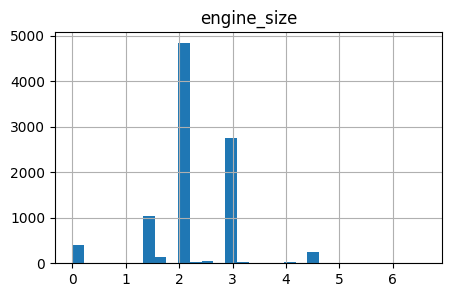

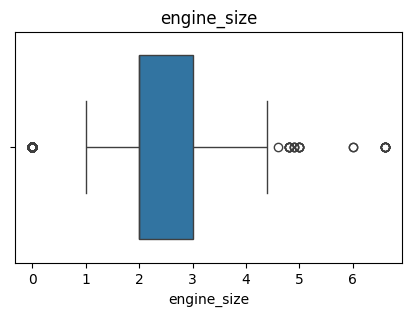

year


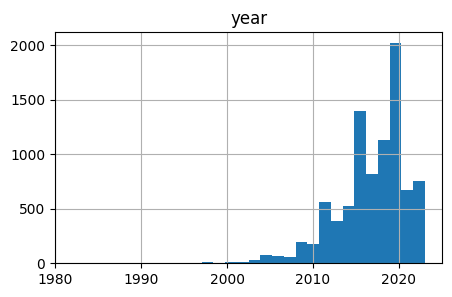

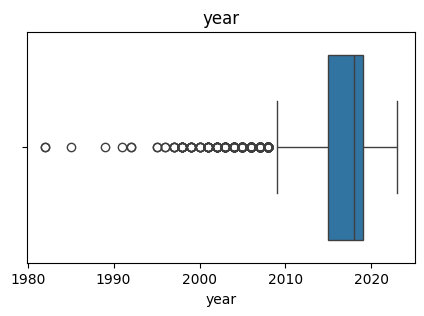

mileage


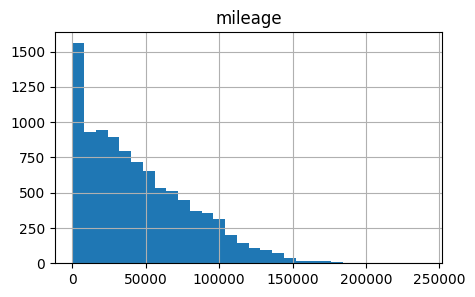

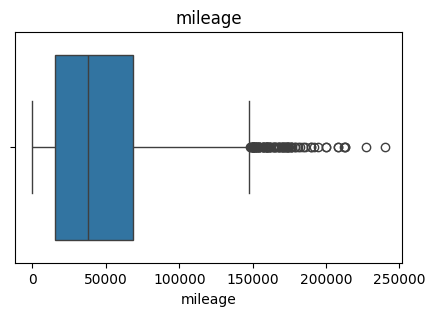

price


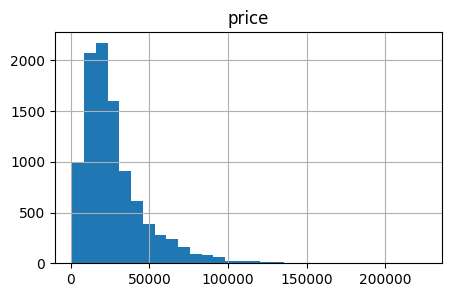

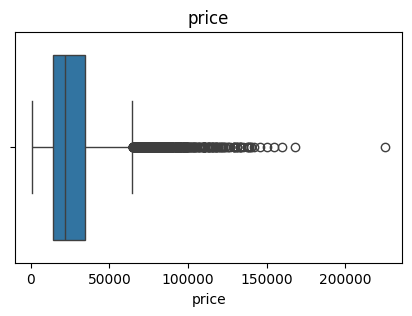

price_position


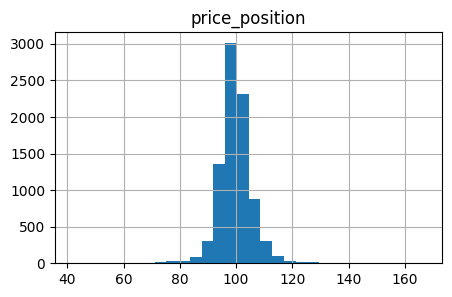

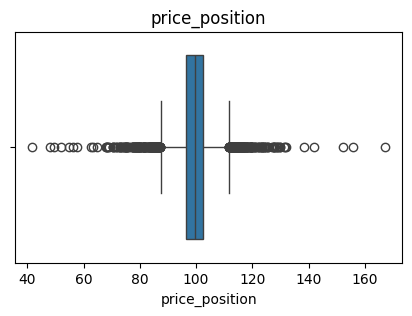

feature_1


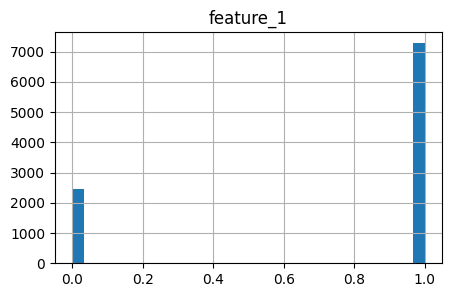

feature_2


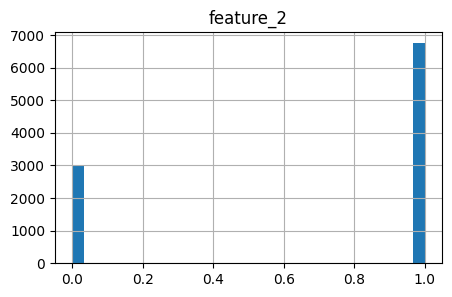

feature_3


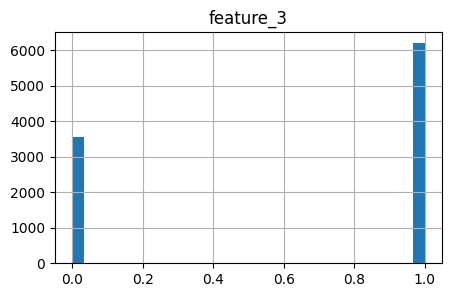

feature_4


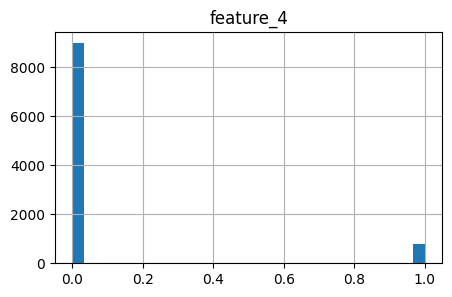

feature_5


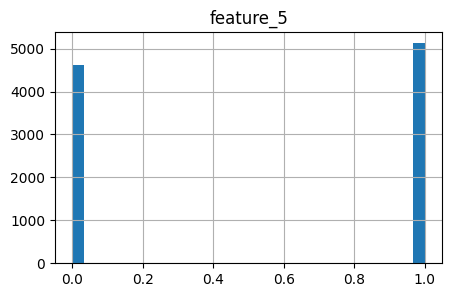

feature_6


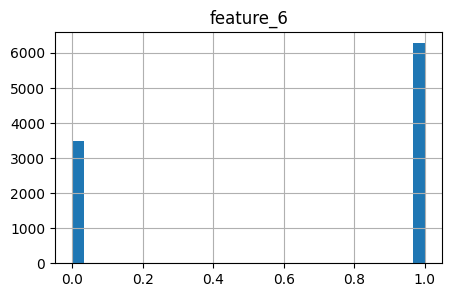

feature_7


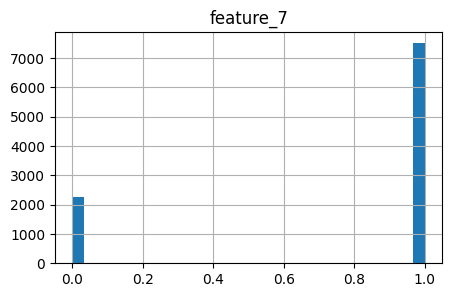

feature_8


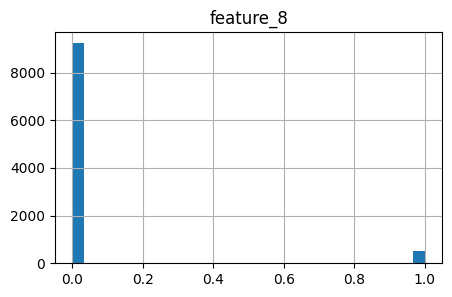

feature_9


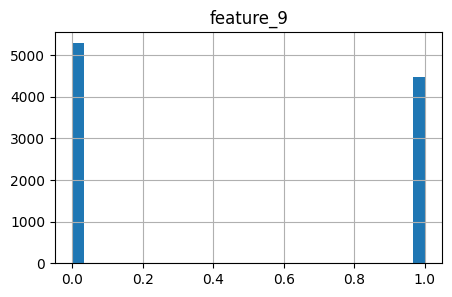

feature_10


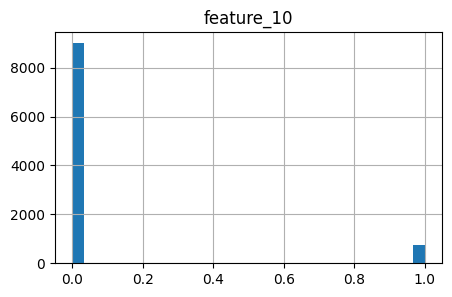

In [36]:
# distributions of numerical and binary variables
for col in numeric_columns + binary_columns:
    print(col)
    # histogram
    plt.figure(figsize=(5, 3))
    df[col].hist(bins=30)
    plt.title(col)
    plt.show()

    # boxplot
    if "feature" not in col:
        plt.figure(figsize=(5, 3))
        sns.boxplot(data=df, x=col)
        plt.title(col)
        plt.show()

## Correlations

### Numerical Correlations

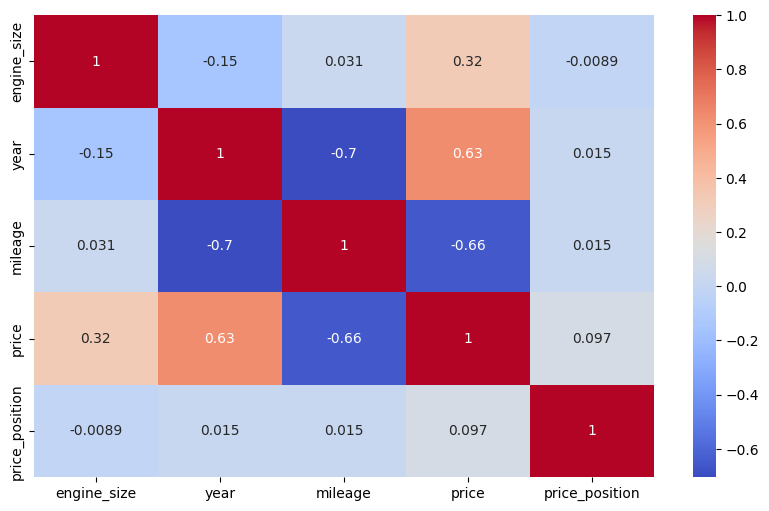

In [41]:
# data correlations
df_numeric = df[numeric_columns]
correlation_matrix = df_numeric.corr()

# heatmap of correlation index
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

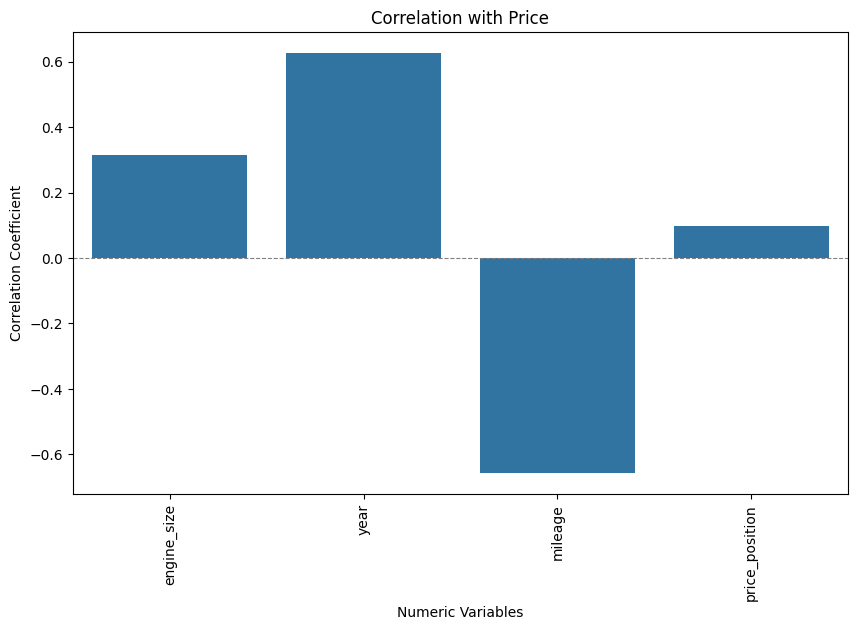

In [50]:
# get correlations with the target variable (price)
target_corr = correlation_matrix["price"].drop("price")

# correlations with target variable (price)
plt.figure(figsize=(10, 6))
sns.barplot(x=target_corr.index, y=target_corr.values)
plt.title("Correlation with Price")
plt.xlabel("Numeric Variables")
plt.xticks(rotation=90)
plt.ylabel("Correlation Coefficient")
plt.axhline(0, color="grey", linewidth=0.8, linestyle="--")  # reference line (y=0)
plt.show()

### Numerical and Binary Correlations

engine_size   : 0.25
year          : 0.71
mileage       : -0.65
price         : 1.0
price_position: 0.1
feature_1     : -0.13
feature_2     : -0.16
feature_3     : -0.05
feature_4     : 0.29
feature_5     : 0.37
feature_6     : -0.34
feature_7     : 0.17
feature_8     : -0.05
feature_9     : -0.22
feature_10    : 0.17


/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_48962/3092566551.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=correlation_df, x='Variable', y='Correlation', palette='viridis')


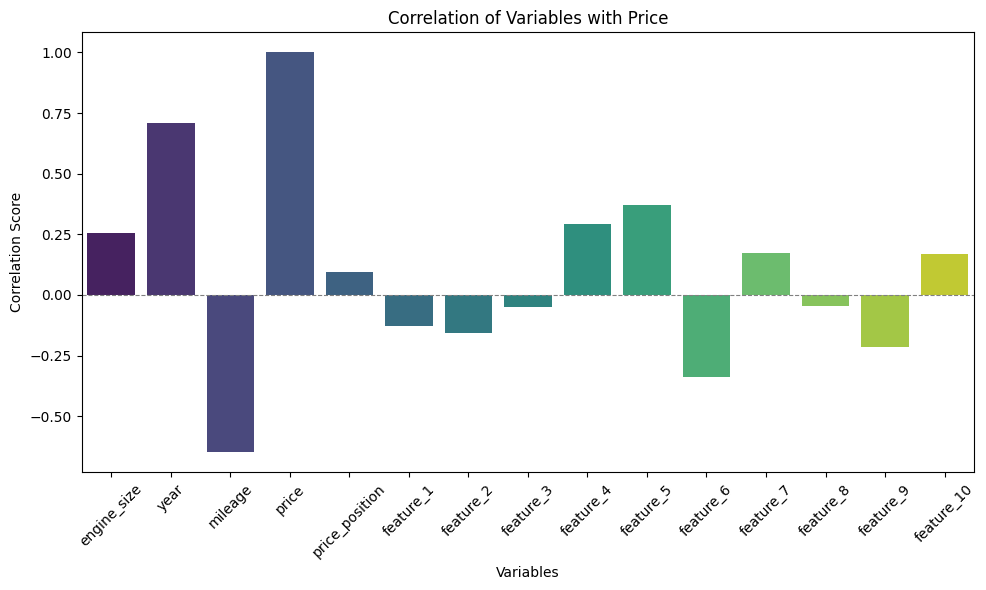

In [51]:
# Initialize a list to store correlation results
correlation_results = []

# to handle
df = df.dropna()

# correlation for continuous variables
max_name_length = max(len(col) for col in numeric_columns + binary_columns)
for column in numeric_columns:
    correlation, _ = stats.pearsonr(df["price"], df[column])  # Use Pearson correlation
    correlation_results.append((column, correlation))
    print(f"{column:<{max_name_length}}: {round(correlation, 2)}")

# point biserial correlation for binary variables
max_name_length = max(len(col) for col in numeric_columns + binary_columns)
for column in binary_columns:
    correlation, _ = stats.pointbiserialr(df["price"], df[column])
    correlation_results.append((column, correlation))
    print(f"{column:<{max_name_length}}: {round(correlation, 2)}")

# dataframe of results
correlation_df = pd.DataFrame(correlation_results, columns=["Variable", "Correlation"])

# plot
plt.figure(figsize=(10, 6))
sns.barplot(data=correlation_df, x="Variable", y="Correlation", palette="viridis")
plt.title("Correlation of Variables with Price")
plt.xticks(rotation=45)
plt.xlabel("Variables")
plt.ylabel("Correlation Score")
plt.axhline(0, color="grey", linewidth=0.8, linestyle="--")  # reference line (y=0)
plt.tight_layout()
plt.show()

- Strong Correlations: The most significant relationships are observed with year (strong positive) and mileage (strong negative)
- Features like feature_5 and feature_4 have moderate positive correlations and should be considered as influential predictors
- Most of the features (e.g., feature_1, feature_2, feature_3) show weak or negligible correlations with price, suggesting they might not be as impactful in explaining the variance of the price
- Surprisingly engine size only has a weak positive correlation with price. Larger engine sizes are slightly associated with higher values in the target variable.

### Categorical Correlations

/var/folders/vr/53g6891d1f95k7gpttqp4mvm0000gn/T/ipykernel_48962/4103714291.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fuel_type', y='price', data=df_category, palette='viridis')


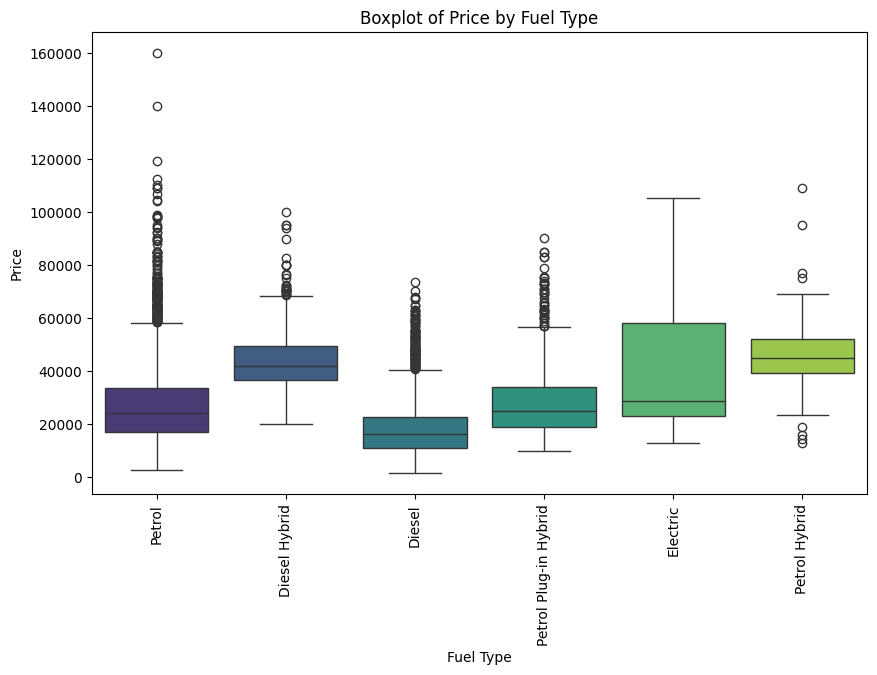

In [52]:
# examine distribution of price within a categorial variable per category
df_category = df[["price", "fuel_type"]]

# plot
plt.figure(figsize=(10, 6))
sns.boxplot(x="fuel_type", y="price", data=df_category, palette="viridis")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Boxplot of Price by Fuel Type")
plt.xticks(rotation=90)
plt.show()

- clear difference between price values between fuel type category values -> use ANOVA to assess differences in means within categorical variables and perform an F-test to understand target variable significance

In [53]:
# perform ANOVA analysis on the categorical variables
for col in categorical_columns:
    if df[col].nunique() > 1:
        anova_result = stats.f_oneway(
            *[df["price"][df[col] == category] for category in df[col].unique()]
        )
        print(
            f"{col}: ANOVA F-statistic: {anova_result.statistic}, p-value: {anova_result.pvalue}"
        )

model: ANOVA F-statistic: 201.35093358717788, p-value: 0.0
body_type: ANOVA F-statistic: 149.74493510903577, p-value: 3.0394966553931467e-181
fuel_type: ANOVA F-statistic: 585.235940987595, p-value: 0.0
transmission: ANOVA F-statistic: 1402.7605714875842, p-value: 2.991575674232042e-284
derivative: ANOVA F-statistic: 49.634691036957854, p-value: 0.0
plate: ANOVA F-statistic: 438.61259187943205, p-value: 0.0
colour: ANOVA F-statistic: 33.90197802967706, p-value: 9.698284085263471e-90
area: ANOVA F-statistic: 6.1047411394884215, p-value: 1.7938186053528378e-79


- All F-statistics are large, indicating the categorical variables have a highly significant effect on the continuous target variable (price)
- The magnitude of the F-statistics given an indiciation of the relative power of each categorical varibale, with the transmission and fuel_type having a large effect than than area or colour